In [9]:
%run ../../utils/commonImports.py
%matplotlib inline

In [10]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg\\tree_search.pkl"

# Grid search evaluation

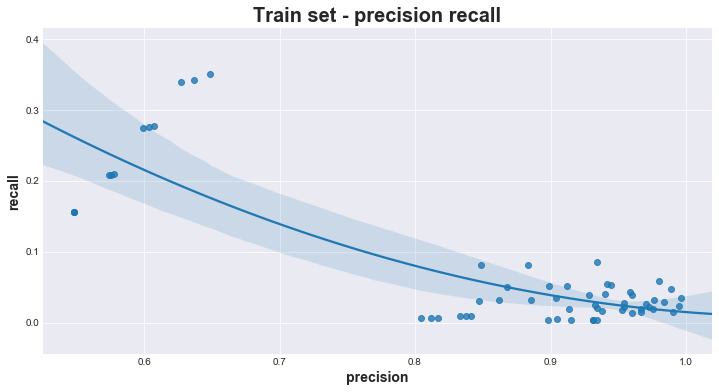

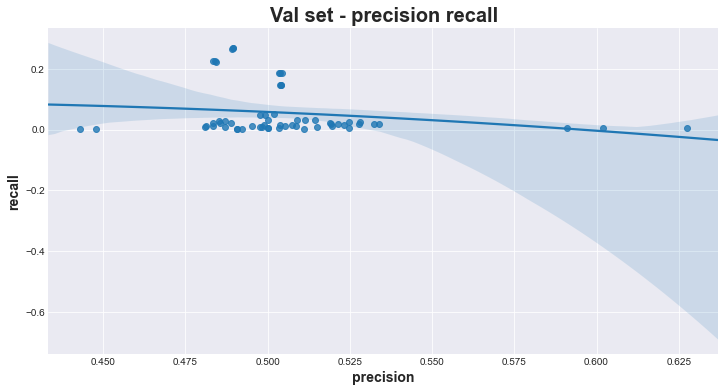

In [11]:
from utils.evaluation import gs_report

grid_search, stats_val = gs_report(data_root, gs_path)

# Model selection

In [5]:
import pandas as pd

class ThresholdModel:
    def __init__(self, clf, threshold_1=0.5):
        self.clf = clf
        self.threshold_1 = threshold_1
        
    def predict(self, X):
        probabs = pd.Series(self.clf.predict_proba(X)[:, 1])
        labels = probabs > self.threshold_1
        return labels.apply(int)

In [12]:
stats_val.sort_values('precision', ascending=False).head(10)

,precision,recall,f1
11,0.6275,0.0047,0.0093
1,0.6019,0.0048,0.0095
6,0.5909,0.0048,0.0095
49,0.5339,0.0197,0.0380
26,0.5323,0.0200,0.0385
48,0.5282,0.0255,0.0486
54,0.5277,0.0182,0.0352
12,0.5248,0.0054,0.0108
53,0.5247,0.0250,0.0477
59,0.5231,0.0158,0.0306


In [13]:
from utils.evaluation import clf_report

clf = grid_search.clfs[11]
# threshold_model = ThresholdModel(clf, 0.6)
# clf = threshold_model
clf_report(clf, data_root)

## Train data

,predicted_0,predicted_1
true_0,37210,48
true_1,31834,197


Precision: 0.804
Recall: 0.006



## Validation data

,predicted_0,predicted_1
true_0,16037,38
true_1,13557,64


Precision: 0.627
Recall: 0.005



## Test data

,predicted_0,predicted_1
true_0,22907,58
true_1,19380,78


Precision: 0.574
Recall: 0.004



In [14]:
clf.class_weight

{0: 2, 1: 1}